<a href="https://colab.research.google.com/github/abundyMB/nba-machine-learning-project/blob/master/Project_NBA_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting NBA Players' Average Points per Game**

**Authors:**

Siju Abraham

Jose Alvarado

Andrew Bundy

Jeffrey Cook




---

# Choice of Dataset

This [NBA dataset sourced from Kaggle](https://www.kaggle.com/datasets/justinas/nba-players-data) contains data of 20+ years worth of NBA statistics including data from the 2020 season. In total, the data starts from 1996 all the way to 2020. The dataset’s 22 columns include, but is not limited to: a player’s age, height, weight and place of birth. It also includes details such as the player’s team name, a player’s draft year and round pick. In addition to those stats, this dataset includes scoring details such as the average number of points scored per game, rebounds, assists, and total games played by any given player. However, for our research purposes, we will need to calculate BMI since this is not provided in the dataset explicitly.

This data was originally pulled from [Official NBA Stats | NBA.com](https://www.nba.com/stats/) and contained missing data which have since been filled. As the author suggests, this dataset could be potentially used to analyze the geographical diversity of NBA players or how the body stature of a typical NBA player has changed over the years. We chose to use this dataset since the NBA is very relevant now, as the 2022 NBA Playoff games are ongoing. Additionally, as a group we were interested in a sports theme.





---



# What To Predict

Body Mass Index (BMI) vs Average Points per Game

We will be studying the relationship between a player’s BMI and the average number of points they scored per game.

Using an NBA Player dataset, we will try to figure out if there is any relationship between a player’s BMI and the average number of points they score per game. We’ll try to solve this using each players’ height and weight, and relate that to their average scoring per game. We will need to calculate BMI since this is not given in the dataset explicitly. In essence, we can find a relationship between a player’s stature, and their corresponding average points per game.




---



# Features Used to Predict

We will use player BMI as a predictor for the player's average number of points per game. To calculate BMI, we will take the player's weight in kilograms and divide it by their height in meters (which will be calculated by dividing their height in centimeters by 100). The calculation for BMI is kg/m^2.



---



# Environment Set Up

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore

---

# Preprocessing

Preprocessing includes creating a BMI column from the formula described above (kg/m^2) and a column for whether or not a player was drafted in the first round. We also changed first round pick from a boolean data type to float for use in the linear regression models.

Further preprocessing will take place in the Machine Learning sections, and will include scaling our data.

In [18]:
# Read the data
url = 'https://raw.githubusercontent.com/abundyMB/nba-machine-learning-project/master/all_seasons.csv'
df = pd.read_csv(url)

# Add new columns for BMI. 
df['bmi'] = df['player_weight'] / (df['player_height'] / 100.0)**2

# Add new column for whether a player was picked in the first round. 
# To be used in the updated hypothesis.
df['first_round_pick'] = df['draft_round'] == "1"
df['first_round_pick'] = df['first_round_pick'].astype(float)


---

# Data Exploration



For our initial exploration of the data, we will be viewing the data set with df.info() and view a random sampling of 10 rows. 

In [19]:
df.info()
print(df.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11700 entries, 0 to 11699
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11700 non-null  int64  
 1   player_name        11700 non-null  object 
 2   team_abbreviation  11700 non-null  object 
 3   age                11700 non-null  float64
 4   player_height      11700 non-null  float64
 5   player_weight      11700 non-null  float64
 6   college            11700 non-null  object 
 7   country            11700 non-null  object 
 8   draft_year         11700 non-null  object 
 9   draft_round        11700 non-null  object 
 10  draft_number       11700 non-null  object 
 11  gp                 11700 non-null  int64  
 12  pts                11700 non-null  float64
 13  reb                11700 non-null  float64
 14  ast                11700 non-null  float64
 15  net_rating         11700 non-null  float64
 16  oreb_pct           117

Correlation scores between average points per game and other factors.

In [20]:
print(df.corrwith(df['pts']).sort_values(ascending=False))

pts                 1.000000
ast                 0.656564
usg_pct             0.638037
reb                 0.622818
gp                  0.538367
ts_pct              0.378961
first_round_pick    0.368642
ast_pct             0.330269
net_rating          0.221002
dreb_pct            0.050246
Unnamed: 0          0.042203
bmi                 0.023521
age                 0.002873
player_weight      -0.030655
player_height      -0.060524
oreb_pct           -0.124345
dtype: float64


Heatmap of correlational scores for our dataframe.

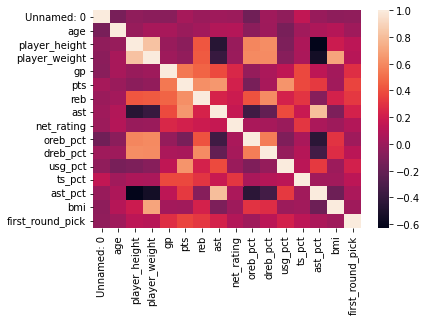

In [21]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

---

# Visualization

Scatterplot showing average points per game by player BMI.

Text(0.5, 1.0, 'Average Points per Game by Player BMI')

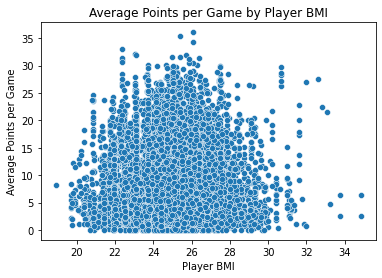

In [22]:
sns.scatterplot(data=df, x='bmi', y='pts')
plt.xlabel('Player BMI')
plt.ylabel('Average Points per Game')
plt.title('Average Points per Game by Player BMI')



---


# Machine Learning

Based on our initial hypothesis that BMI would impact a player's points per game, we created a model using KNN Regression with a number k = 10 neighbors.

We used zscore to transform our data.

Additionally, we created a second model using linear regression for comparison purposes.

We used train/test split at 70%/30% for all models.


Error calculation for bmi
KNN RMSE w/ k = 10: 6.01




Text(0, 0.5, 'Predicted')

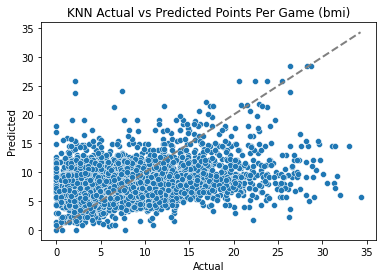

In [23]:
# Split data for training and testing
predictors = ['bmi']
X = df[predictors].values
y = df['pts'].values

# Transform data using zscore.
X_s = zscore(X)
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.30, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Make predictions using distance weighted data.
knn = KNeighborsRegressor(n_neighbors=10, algorithm='brute', weights='distance')
knn.fit(X_train, y_train)
predicted = knn.predict(X_test)

# Get RMSE.
print('Error calculation for bmi')
rmse = np.sqrt(((predicted - y_test)**2).mean())
print('KNN RMSE w/ k = 10: {:.2f}'.format(rmse))

print('\n')

# Display predicted vs. actual average points per game
actual = y_test
predicted = knn.predict(X_test)
sns.scatterplot(x=actual, y=predicted)
a = min(actual.min(), predicted.min())
b = max(actual.max(), predicted.max())
plt.plot([a, b], [a, b], color='grey', linestyle='dashed', linewidth=2)
plt.title('KNN Actual vs Predicted Points Per Game (bmi)')
plt.xlabel('Actual')
plt.ylabel('Predicted')

---

We also used linear regression to see if there is a difference between our KNN and LG models.

Error calculations for bmi
r-squared value: 0.00
Linear Regression RMSE: 6.15




Text(0, 0.5, 'Predicted')

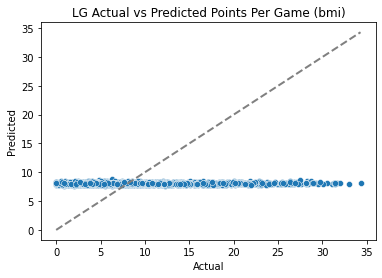

In [24]:
# Make predictions using linear regression.
reg = LinearRegression()
reg.fit(X_train, y_train)
predicted = reg.predict(X_test)
print('Error calculations for bmi')
print('r-squared value: {:.2f}'.format(reg.score(X_train,y_train)))
print('Linear Regression RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, reg.predict(X_test)))))

print('\n')

# Display predicted vs. actual average points per game
actual = y_test
predicted = reg.predict(X_test)
sns.scatterplot(x=actual, y=predicted)
a = min(actual.min(), predicted.min())
b = max(actual.max(), predicted.max())
plt.plot([a, b], [a, b], color='grey', linestyle='dashed', linewidth=2)
plt.title('LG Actual vs Predicted Points Per Game (bmi)')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Conclusion

Based on both the KNN Regressor and Linear Regression models, BMI is a poor indicator for average points per game.

---

# What To Predict

After reviewing the correlation data and studying the above model using BMI as the sole indicator for average points per game, we learned  BMI is a poor predictor of the average points scored per game. 

Our new model will take into account four key factors with higher correlational values: 
1. usg_pct: Percentage of team plays used by the player while he was on the floor
2. gp: Number of games played in a season
3. ts_pct: Measure of the player's shooting efficiency that takes into account  2- and 3-point shots, as well as free throws
4. first_round_pick: Derived column for whether or not a player was drafted in the first round

---

# Visualization

Scatterplot showing average points per game by usage percent.


Text(0.5, 1.0, 'Average Points per Game by Usage Percent')

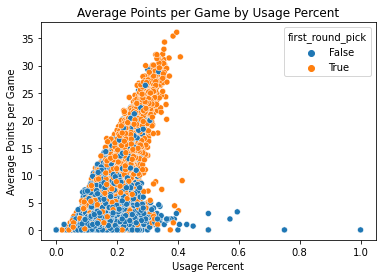

In [25]:
sns.scatterplot(data=df, x='usg_pct', y='pts', hue=df['first_round_pick'].astype(bool))
plt.xlabel('Usage Percent')
plt.ylabel('Average Points per Game')
plt.title('Average Points per Game by Usage Percent')

Scatterplot showing average points per game by games played.

Text(0.5, 1.0, 'Average Points per Game by Games Played')

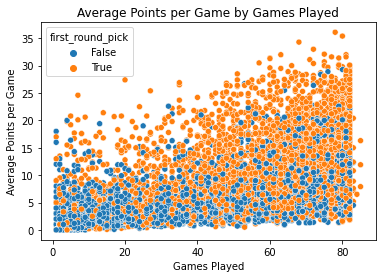

In [26]:
sns.scatterplot(data=df, x='gp', y='pts', hue=df['first_round_pick'].astype(bool))
plt.xlabel('Games Played')
plt.ylabel('Average Points per Game')
plt.title('Average Points per Game by Games Played')

Scatterplot showing average points per game by shooting efficiency.

Text(0.5, 1.0, 'Average Points per Game by Shooting Efficiency')

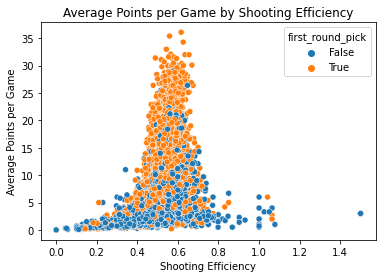

In [27]:
sns.scatterplot(data=df, x='ts_pct', y='pts', hue=df['first_round_pick'].astype(bool))
plt.xlabel('Shooting Efficiency')
plt.ylabel('Average Points per Game')
plt.title('Average Points per Game by Shooting Efficiency')

Bar plot showing mean values of average points per game by whether player was drafted in the first round.

Text(0.5, 1.0, 'Mean points per game by Drafted in the First Round')

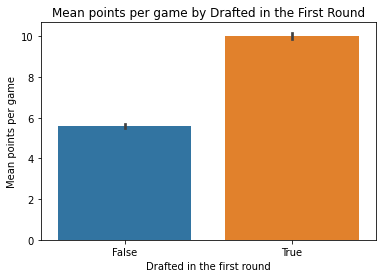

In [28]:
sns.barplot(x=df['first_round_pick'].astype(bool), y=df['pts'])
plt.xlabel('Drafted in the first round')
plt.ylabel('Mean points per game')
plt.title('Mean points per game by Drafted in the First Round')

---

# Machine Learning

Like we did with our BMI models, we used both KNN Regressor and Linear Regression models for the four predictors.

We used train/test split at 70%/30% for all models.

We also used zscore to transform the data and we scaled the data after our train/test split.

Error calculation for usg_pct, gp, ts_pct, first_round_pick
KNN RMSE w/ k = 10: 2.71




Text(0, 0.5, 'Predicted')

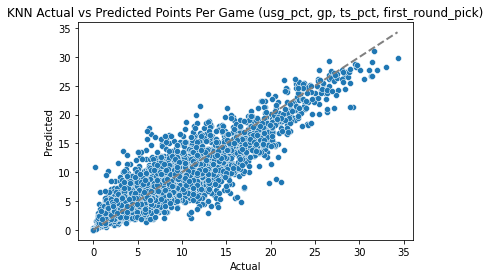

In [29]:
# Assign predictors.
predictors = ['usg_pct', 'gp', 'ts_pct', 'first_round_pick']
X = df[predictors].values
y = df['pts'].values

# Transform data using zscore.
X_s = zscore(X)

# Train the model.
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.30, random_state=42)

# Scale data.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Make predictions using KNN regression, weighted for distance.
knn = KNeighborsRegressor(n_neighbors=10, algorithm='brute', weights='distance') 
knn.fit(X_train, y_train)
predicted = knn.predict(X_test)

# Calculate the RMSE.
print('Error calculation for usg_pct, gp, ts_pct, first_round_pick')
rmse = np.sqrt(((predicted - y_test)**2).mean())
print('KNN RMSE w/ k = 10: {:.2f}'.format(rmse))

print('\n')

# Plot predicted vs. actual average points per game.
actual = y_test
sns.scatterplot(x=actual, y=predicted)
a = min(actual.min(), predicted.min())
b = max(actual.max(), predicted.max())
plt.plot([a, b], [a, b], color='grey', linestyle='dashed', linewidth=2)
plt.title('KNN Actual vs Predicted Points Per Game (usg_pct, gp, ts_pct, first_round_pick)')
plt.xlabel('Actual')
plt.ylabel('Predicted')

---

We will also using linear regression to see if there is a difference between KNN and LG.

Error calculations for usg_pct, gp, ts_pct, first_round_pick
Linear Regression RMSE: 3.54
r-squared value: 0.64




Text(0, 0.5, 'Predicted')

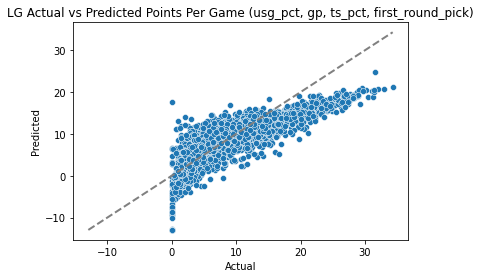

In [30]:
# Make predictions using linear regression.
reg = LinearRegression()
reg.fit(X_train, y_train)
predicted = reg.predict(X_test)

# Calculate RMSE and r-square value
rmse = np.sqrt(((predicted - y_test)**2).mean())
print('Error calculations for usg_pct, gp, ts_pct, first_round_pick')
print('Linear Regression RMSE: {:.2f}'.format(rmse))
print('r-squared value: {:.2f}'.format(reg.score(X_train,y_train)))

print('\n')

# Display predicted vs. actual average points per game
actual = y_test
predicted = reg.predict(X_test)
sns.scatterplot(x=actual, y=predicted)
a = min(actual.min(), predicted.min())
b = max(actual.max(), predicted.max())
plt.plot([a, b], [a, b], color='grey', linestyle='dashed', linewidth=2)
plt.title('LG Actual vs Predicted Points Per Game (usg_pct, gp, ts_pct, first_round_pick)')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Conclusion

Using usage percentage, games played, shooting efficiency, and first round pick status, we were able to find a much higher correlation with both the KNN and LG models compared to using BMI alone. However, our LG model is not as accurate as our KNN model and even predicts some negative values for average points scored per game. 